In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# GAZEDATA 4 MAP

In [42]:
gaze = pd.read_csv('data/gaze_data4.csv')
gaze = gaze.dropna()
x = gaze["left_gaze_origin_in_user_x"]
y = gaze["left_gaze_origin_in_user_y"]

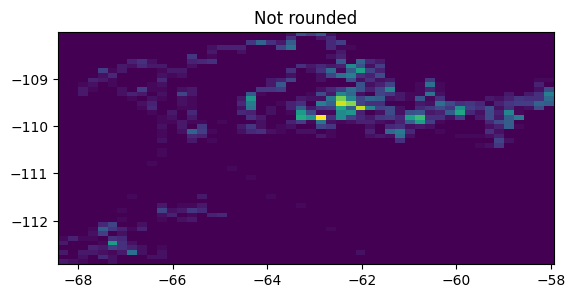

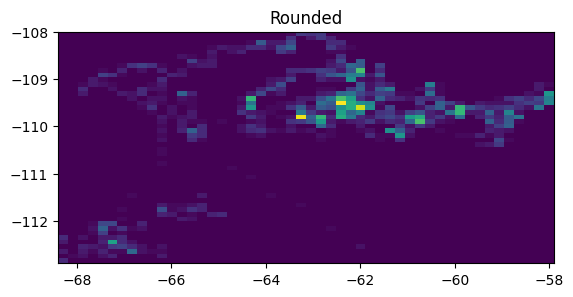

In [43]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.title("Not rounded")
plt.show()

x1 = x.round(1)
y1 = y.round(1)

heatmap, xedges, yedges = np.histogram2d(x1, y1, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.title("Rounded")
plt.show()

C:\Users\s225785\AppData\Local\Temp\ipykernel_17100\3242638966.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


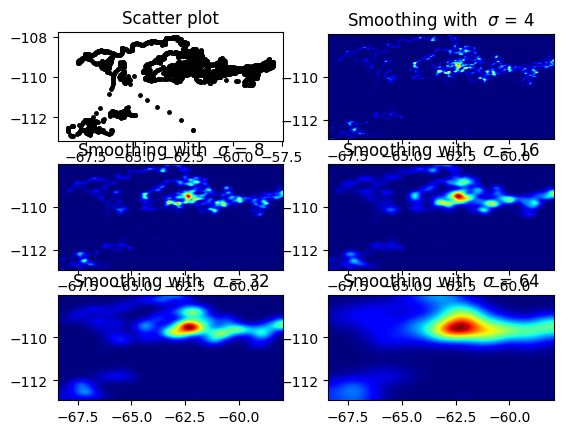

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(3, 2)

# Generate some test data
x = gaze["left_gaze_origin_in_user_x"]
y = gaze["left_gaze_origin_in_user_y"]

sigmas = [0, 4, 8, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()